In [107]:
import numpy as np
import pandas as pd
from uncertainties import unumpy
#reading and defining variable values
continuum = pd.read_csv("table1csv.csv")
#measurement a 2024 east
measurement_2024ea_b=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2024) & (continuum['color']=='b')]
measurement_2024ea_y=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2024) & (continuum['color']=='y')]
measurement_2024ea_r=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2024) & (continuum['color']=='r')]
measurement_2024ea_ir=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2024) & (continuum['color']=='ir')]
b_24ea=unumpy.uarray(measurement_2024ea_b['intensity mean'], measurement_2024ea_b['intensity sd'])
y_24ea=unumpy.uarray(measurement_2024ea_y['intensity mean'], measurement_2024ea_y['intensity sd'])
r_24ea=unumpy.uarray(measurement_2024ea_r['intensity mean'], measurement_2024ea_r['intensity sd'])
ir_24ea=unumpy.uarray(measurement_2024ea_ir['intensity mean'], measurement_2024ea_ir['intensity sd'])
z_24ea=measurement_2024ea_ir['angle']
sundist_24ea=measurement_2024ea_ir['sundist']

#measurement b 2024 east
measurement_2024eb_b=continuum[(continuum['iteration']=='b') & (continuum['direction']=='e') &
                             (continuum['datayear']==2024) & (continuum['color']=='b')]
measurement_2024eb_y=continuum[(continuum['iteration']=='b') & (continuum['direction']=='e') &
                             (continuum['datayear']==2024) & (continuum['color']=='y')]
measurement_2024eb_r=continuum[(continuum['iteration']=='b') & (continuum['direction']=='e') &
                             (continuum['datayear']==2024) & (continuum['color']=='r')]
measurement_2024eb_ir=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2024) & (continuum['color']=='ir')]
b_24eb=unumpy.uarray(measurement_2024eb_b['intensity mean'], measurement_2024eb_b['intensity sd'])
y_24eb=unumpy.uarray(measurement_2024eb_y['intensity mean'], measurement_2024eb_y['intensity sd'])
r_24eb=unumpy.uarray(measurement_2024eb_r['intensity mean'], measurement_2024eb_r['intensity sd'])
ir_24eb=unumpy.uarray(measurement_2024eb_ir['intensity mean'], measurement_2024eb_ir['intensity sd'])
z_24eb=measurement_2024eb_ir['angle']
sundist_24eb=measurement_2024eb_ir['sundist']

#measurement a 2022 east
measurement_2022ea_b=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2022) & (continuum['color']=='b')]
measurement_2022ea_y=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2022) & (continuum['color']=='y')]
measurement_2022ea_r=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2022) & (continuum['color']=='r')]
measurement_2022ea_ir=continuum[(continuum['iteration']=='a') & (continuum['direction']=='e') &
                             (continuum['datayear']==2022) & (continuum['color']=='ir')]
b_22ea=unumpy.uarray(measurement_2022ea_b['intensity mean'], measurement_2022ea_b['intensity sd'])
y_22ea=unumpy.uarray(measurement_2022ea_y['intensity mean'], measurement_2022ea_y['intensity sd'])
r_22ea=unumpy.uarray(measurement_2022ea_r['intensity mean'], measurement_2022ea_r['intensity sd'])
ir_22ea=unumpy.uarray(measurement_2022ea_ir['intensity mean'], measurement_2022ea_ir['intensity sd'])
z_22ea=measurement_2022ea_ir['angle']
sundist_22ea=measurement_2022ea_ir['sundist']

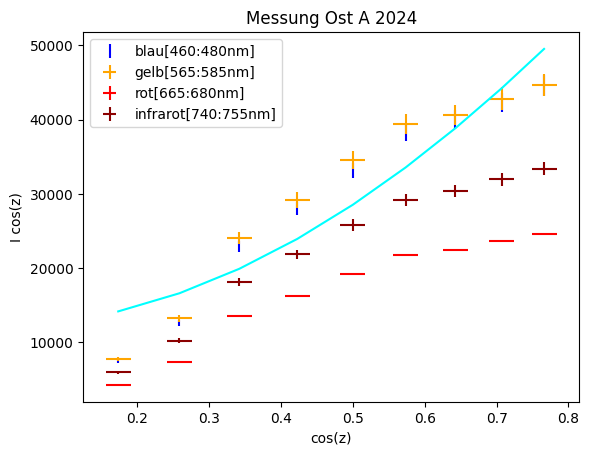

In [110]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#fit function for I*cos(z)=a0+a3*cos(z)
def cont_fit(z, a0, a3):
    return a0+a3*np.cos(z)
plt.errorbar(np.cos(z_24ea*2*np.pi/360), np.cos(z_24ea*2*np.pi/360) * [b_24ea[i].n for i in range(len(b_24ea))],
             np.cos(z_24ea*2*np.pi/360) * [b_24ea[i].s for i in range(len(b_24ea))],
             ls='', color="blue", label="blau[460:480nm]")
plt.errorbar(np.cos(z_24ea*2*np.pi/360), np.cos(z_24ea*2*np.pi/360) * [y_24ea[i].n for i in range(len(y_24ea))],
             np.cos(z_24ea*2*np.pi/360) * [y_24ea[i].s for i in range(len(y_24ea))], np.ones(len(z_24ea))*2*np.pi/360,
             ls='', color="orange", label="gelb[565:585nm]")
plt.errorbar(np.cos(z_24ea*2*np.pi/360), np.cos(z_24ea*2*np.pi/360) * [r_24ea[i].n for i in range(len(r_24ea))],
             np.cos(z_24ea*2*np.pi/360) * [r_24ea[i].s for i in range(len(r_24ea))], np.ones(len(z_24ea))*2*np.pi/360,
             ls='', color="red", label="rot[665:680nm]")
plt.errorbar(np.cos(z_24ea*2*np.pi/360), np.cos(z_24ea*2*np.pi/360) * [ir_24ea[i].n for i in range(len(ir_24ea))],
             np.cos(z_24ea*2*np.pi/360) * [ir_24ea[i].s for i in range(len(ir_24ea))], np.ones(len(z_24ea))*2*np.pi/360,
             ls='', color="darkred", label="infrarot[740:755nm]")

vcurve = np.vectorize(cont_fit, excluded=set([1]))
popt, pcov = curve_fit(vcurve, np.cos(z_24ea*2*np.pi/360), np.cos(z_24ea*2*np.pi/360) * [b_24ea[i].n for i in range(len(b_24ea))], p0=[1, 1])
plt.plot(np.cos(z_24ea*2*np.pi/360), cont_fit(np.cos(z_24ea*2*np.pi/360), popt[0], popt[1]),
         color="cyan")

plt.title("Messung Ost A 2024")
plt.ylabel("I cos(z)")
plt.xlabel("cos(z)")
plt.legend()
plt.show()

blau a0=  40405.140188778794 a3=  -27867.066097626706
gelb a0=  29419.12209180171 a3=  -20908.08770029384
rot a0=  14808.576620496076 a3=  -10660.670883839915
infrarot a0=  13024.725553786055 a3=  -9413.433403289097


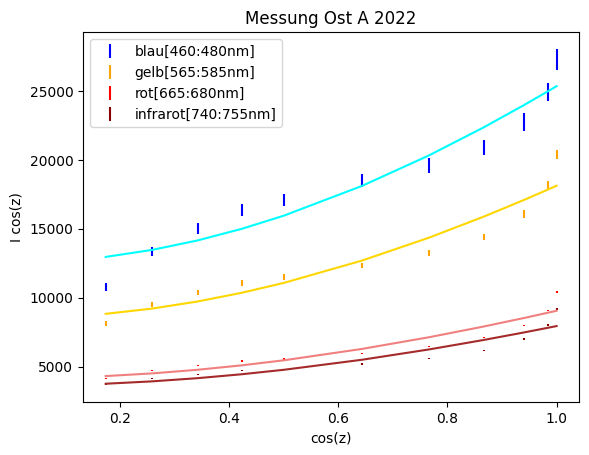

In [115]:
#fit function for I*cos(z)=a0+a3*cos(z)
def cont_fit(z, a0, a3):
    return a0+a3*np.cos(z)
plt.errorbar(np.cos(z_22ea*2*np.pi/360), np.cos(z_22ea*2*np.pi/360) * [b_22ea[i].n for i in range(len(b_22ea))],
             np.cos(z_22ea*2*np.pi/360) * [b_22ea[i].s for i in range(len(b_22ea))],
             ls='', color="blue", label="blau[460:480nm]")
plt.errorbar(np.cos(z_22ea*2*np.pi/360), np.cos(z_22ea*2*np.pi/360) * [y_22ea[i].n for i in range(len(y_22ea))],
             np.cos(z_22ea*2*np.pi/360) * [y_22ea[i].s for i in range(len(y_22ea))],
             ls='', color="orange", label="gelb[565:585nm]")
plt.errorbar(np.cos(z_22ea*2*np.pi/360), np.cos(z_22ea*2*np.pi/360) * [r_22ea[i].n for i in range(len(r_22ea))],
             np.cos(z_22ea*2*np.pi/360) * [r_22ea[i].s for i in range(len(r_22ea))],
             ls='', color="red", label="rot[665:680nm]")
plt.errorbar(np.cos(z_22ea*2*np.pi/360), np.cos(z_22ea*2*np.pi/360) * [ir_22ea[i].n for i in range(len(ir_22ea))],
             np.cos(z_22ea*2*np.pi/360) * [ir_22ea[i].s for i in range(len(ir_22ea))],
             ls='', color="darkred", label="infrarot[740:755nm]")

vcurve = np.vectorize(cont_fit, excluded=set([1]))
popt, pcov = curve_fit(vcurve, np.cos(z_22ea*2*np.pi/360), np.cos(z_22ea*2*np.pi/360) * [b_22ea[i].n for i in range(len(b_22ea))], p0=[1, 1])
plt.plot(np.cos(z_22ea*2*np.pi/360), cont_fit(np.cos(z_22ea*2*np.pi/360), popt[0], popt[1]),
         color="cyan")
print("blau a0= ", popt[0], "a3= ", popt[1])

popt, pcov = curve_fit(vcurve, np.cos(z_22ea*2*np.pi/360), np.cos(z_22ea*2*np.pi/360) * [y_22ea[i].n for i in range(len(y_22ea))], p0=[1, 1])
plt.plot(np.cos(z_22ea*2*np.pi/360), cont_fit(np.cos(z_22ea*2*np.pi/360), popt[0], popt[1]),
         color="gold")
print("gelb a0= ", popt[0], "a3= ", popt[1])

popt, pcov = curve_fit(vcurve, np.cos(z_22ea*2*np.pi/360), np.cos(z_22ea*2*np.pi/360) * [r_22ea[i].n for i in range(len(r_22ea))], p0=[1, 1])
plt.plot(np.cos(z_22ea*2*np.pi/360), cont_fit(np.cos(z_22ea*2*np.pi/360), popt[0], popt[1]),
         color="lightcoral")
print("rot a0= ", popt[0], "a3= ", popt[1])

popt, pcov = curve_fit(vcurve, np.cos(z_22ea*2*np.pi/360), np.cos(z_22ea*2*np.pi/360) * [ir_22ea[i].n for i in range(len(ir_22ea))], p0=[1, 1])
plt.plot(np.cos(z_22ea*2*np.pi/360), cont_fit(np.cos(z_22ea*2*np.pi/360), popt[0], popt[1]),
         color="brown")
print("infrarot a0= ", popt[0], "a3= ", popt[1])

plt.title("Messung Ost A 2022")
plt.ylabel("I cos(z)")
plt.xlabel("cos(z)")
plt.legend()
plt.show()